In [1]:
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

Рассмотрим задачу бинарной классификации. Сгенерируем обучающую выборку и сохраним её в переменные `(train_data, train_labels)`. Каждый объект характеризуется парой признаков $x_1$ и $x_2$.

In [2]:
np.random.seed(67)
points = np.random.uniform(size=(20, 2), low=-1, high=1)
positive = points[np.logical_xor(points[:, 0] >= 0, points[:, 1] >= 0)]
negative = points[np.logical_xor(points[:, 0] >= 0, points[:, 1] < 0)]
train_data = np.vstack([positive, negative])
train_labels = np.hstack([np.ones(positive.shape[0]), np.zeros(negative.shape[0])])

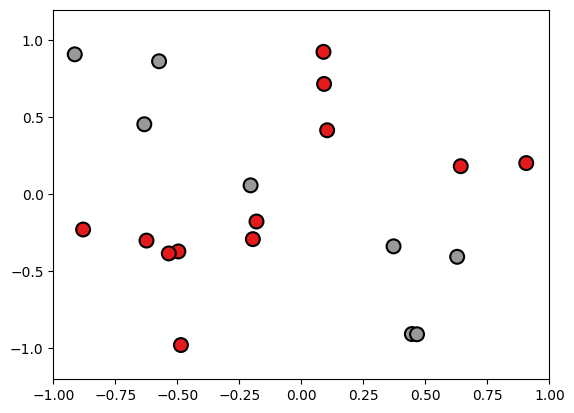

In [3]:
plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)
plt.show()

**Задание 1.** Реализуйте функцию, которая на вход принимает выборку `(X, y)`, индекс признака `feature_id` и порог разбиения `condition`, а возвращает значения энтропийного критерия или критерия Джини.

In [4]:
def information_gain_trash(train_data, train_labels, feature_id, condition, criterion='entropy'):

    if criterion == 'entropy':
        y_L = train_labels[train_data[:, feature_id] < condition]
        y_R = train_labels[train_data[:, feature_id] >= condition]
        nL = len(y_L[y_L == 1])
        NL = len(y_L)
        NR = len(y_R)
        nR = len(y_R[y_R == 1])
        n0 = len(y_L)
        n = len(train_labels)
        if NL == 0 and NR == 0:
            return 1
        elif NL == 0:
            #S_0 = - n0 / n * np.log2(n0 / n) - (n - n0) / n * np.log2((n - n0) / n)
            S_L = 1
            if nR / NR == 0 or nR / NR == 1:
                S_R = 0
            else:
                S_R = - nR / NR * np.log2(nR / NR) - (NR - nR) / NR * np.log2((NR - nR) / NR)
        elif NR == 0:
            #S_0 = - n0 / n * np.log2(n0 / n) - (n - n0) / n * np.log2((n - n0) / n)
            S_R = 1
            if nL / NL == 0 or nL / NL == 1:
                S_L = 0
            else:
                S_L = - nL / NL * np.log2(nL / NL) - (NL - nL) / NL * np.log2((NL - nL) / NL)
        elif nR / NR == 0 or nR / NR == 1:
            S_R = 0
            S_L = - nL / NL * np.log2(nL / NL) - (NL - nL) / NL * np.log2((NL - nL) / NL)
        elif nL / NL == 0 or nL / NL == 1:
            S_L = 0
            S_R = - nR / NR * np.log2(nR / NR) - (NR - nR) / NR * np.log2((NR - nR) / NR)
        else:
            #S_0 = - n0 / n * np.log2(n0 / n) - (n - n0) / n * np.log2((n - n0) / n)
            S_L = - nL / NL * np.log2(nL / NL) - (NL - nL) / NL * np.log2((NL - nL) / NL)
            S_R = - nR / NR * np.log2(nR / NR) - (NR - nR) / NR * np.log2((NR - nR) / NR)
        return - (- n0 / n * S_L - (n - n0) / n * S_R)
    else:
        y_L = train_labels[train_data[:, feature_id] < condition]
        y_R = train_labels[train_data[:, feature_id] >= condition]
        nL = len(y_L[y_L == 1])
        NL = len(y_L)
        NR = len(y_R)
        nR = len(y_R[y_R == 1])
        n0 = len(y_L)
        n = len(train_labels)
        if NL == 0 and NR == 0:
            return 0
        elif NL == 0:
            G_L = 1
            G_R = 1 - (nR / NR)**2 - ((NR - nR) / NR)**2
            return -(- n0 / n * G_L - (n - n0) / n * G_R) * 2
        elif NR == 0:
            G_L = 1 - (nL / NL)**2 - ((NL - nL) / NL)**2
            G_R = 1
            return -(- n0 / n * G_L - (n - n0) / n * G_R) * 2
        else:
            G_L = 1 - (nL / NL)**2 - ((NL - nL) / NL)**2
            G_R = 1 - (nR / NR)**2 - ((NR - nR) / NR)**2
            return -(- n0 / n * G_L - (n - n0) / n * G_R) * 2

In [5]:
def information_gain(X, y, feature_id, condition, criterion="entropy"):
    true_factor = y[X[:, feature_id] < condition]
    prob_true_factor = true_factor.shape[0] / X.shape[0]

    false_factor = y[X[:, feature_id] >= condition]
    prob_false_factor = false_factor.shape[0] / X.shape[0]
    
    if false_factor.shape[0] == 0 or true_factor.shape[0] == 0:
        return 1
    
    prob_left_true = np.count_nonzero(true_factor == 1) / true_factor.shape[0]
    prob_left_false = np.count_nonzero(true_factor == 0) / true_factor.shape[0]

    prob_right_true = np.count_nonzero(false_factor == 1) / false_factor.shape[0]
    prob_right_false = np.count_nonzero(false_factor == 0) / false_factor.shape[0]
    
    if criterion == "entropy":
        if prob_left_true == 0 or prob_left_false == 0 or prob_right_true == 0 or prob_right_false == 0:
            return -1
        # S0 = -prob_true_factor * np.log2(prob_true_factor) - prob_false_factor * np.log2(prob_false_factor)
        SL = -prob_left_true * np.log2(prob_left_true) - prob_left_false * np.log2(prob_left_false)
        SR = -prob_right_true * np.log2(prob_right_true) - prob_right_false * np.log2(prob_right_false)
    elif criterion == "gini":
        # S0 = 1 - (prob_true_factor)**2 - (prob_false_factor)**2
        SL = 1 - (prob_left_true)**2 - (prob_left_false)**2
        SR = 1 - (prob_right_true)**2 - (prob_right_false)**2
    
    return - prob_true_factor * SL - prob_false_factor * SR

In [6]:
information_gain_trash(train_data, train_labels, 0, -0.25)

0.9696948551606777

In [7]:
for t in np.linspace(-1, 1, 20):
    print(t,
          information_gain_trash(train_data,
                           train_labels,
                           0,
                           t,
                           criterion="entropy")
         )

-1.0 0.9709505944546686
-0.8947368421052632 0.901979414618551
-0.7894736842105263 0.9676708883274061
-0.6842105263157895 0.9676708883274061
-0.5789473684210527 0.963547202339972
-0.4736842105263158 0.9696948551606777
-0.368421052631579 0.9696948551606777
-0.26315789473684215 0.9696948551606777
-0.1578947368421053 0.9660973944575522
-0.052631578947368474 0.9660973944575522
0.05263157894736836 0.9660973944575522
0.1578947368421053 0.8796731482129885
0.26315789473684204 0.8796731482129885
0.36842105263157876 0.8796731482129885
0.4736842105263157 0.9685495200071192
0.5789473684210527 0.9685495200071192
0.6842105263157894 0.9328437475208927
0.7894736842105261 0.9328437475208927
0.894736842105263 0.9328437475208927
1.0 0.9709505944546686


**Задание 2.** Реализуйте функцию, которая выбирает предикаты по имеющейся выборке.

In [8]:
def get_conditions_trash(train_data, train_labels):
    n = len(train_data[0])
    res = {}
    for i in range(n):
        x = np.argsort(train_data[:,i])
        r = []
        for j in range(1, len(x)):
            if train_labels[x[j - 1]] != train_labels[x[j]]:
                r.append(np.mean([train_data[x[j - 1]][i], train_data[x[j]][i]]))
        res[i] = r
    return res

In [9]:
def get_conditions(X, y):
    features_count = X.shape[1]
    result = dict()
    for feature in range(features_count):
        vals = sorted(list(zip(X[:, feature], y)), key=lambda x: x[0])
        tmp = []
        prev = vals[0][1]
        feature_result = []

        for x_value, y_value in vals:
            if prev == y_value:
                tmp.append(x_value)
            else:
                prev = y_value
                tmp.append(x_value)
                feature_result.append(np.mean(tmp))
                tmp = [x_value]
        result[feature] = feature_result
    return result

In [10]:
get_conditions_trash(train_data, train_labels)

{0: [-0.8968132995429501,
  -0.7566065949742614,
  -0.6287665022757317,
  -0.5990121190564968,
  -0.554037228654128,
  -0.34507990333227334,
  -0.2000711452800843,
  0.2378704257933334,
  0.6354743396903453],
 1: [-0.9427459061178219,
  -0.3937531883073182,
  -0.3533314885967552,
  -0.3180882719395066,
  -0.05808715883026605,
  0.12152788893462807,
  0.43647296726164697,
  0.5868539488442623,
  0.7913632606727191,
  0.9180910094600978]}

__Задание 3.__ Определение наилучшего предиката.

In [11]:
def get_best_predicate(X, y):
    dict_conditions = get_conditions_trash(X, y)
    
    min_information_gain_value = float('inf')
    min_condition = float('inf')
    min_feature = float('inf')
    
    for feature, conditions in dict_conditions.items():
        for condition in conditions:
            value = information_gain_trash(X, y, feature, condition, criterion="gini")
            if min_information_gain_value > value:
                min_information_gain_value = value
                min_condition = condition
                min_feature = feature
            # print(f"{feature} {condition} {value}")
    return (min_feature, min_condition)

In [12]:
result = get_best_predicate(train_data, train_labels)
result

(1, -0.3937531883073182)

__Задание 4.__ Построение дерева решений.

In [13]:
max_depth = 3

In [14]:
def desicion_tree_step(X, y, max_depth, level=0):
    if level == max_depth:
        return {"target": y.mean()}
    
    best_predicate = get_best_predicate(X, y)
    
    try:
        left_half = X[:, best_predicate[0]] < best_predicate[1]
        right_half = X[:, best_predicate[0]] >= best_predicate[1]

        X_left, y_left = X[left_half], y[left_half]
        X_right, y_right = X[right_half], y[right_half]
    
        return {
            "level": level,
            "predicate": best_predicate,
            "target": y.mean(),
            "left": desicion_tree_step(X_left, y_left, max_depth, level + 1),
            "right": desicion_tree_step(X_right, y_right, max_depth, level + 1),
        }
    except:
        return {"target": y.mean()}

In [15]:
desicion_tree = desicion_tree_step(train_data, train_labels, 3)
desicion_tree

{'level': 0,
 'predicate': (1, -0.3937531883073182),
 'target': 0.4,
 'left': {'level': 1,
  'predicate': (0, -0.01993888924990672),
  'target': 0.75,
  'left': {'target': 0.0},
  'right': {'target': 1.0}},
 'right': {'level': 1,
  'predicate': (0, -0.554037228654128),
  'target': 0.3125,
  'left': {'level': 2,
   'predicate': (1, 0.11427511929561229),
   'target': 0.6,
   'left': {'target': 0.0},
   'right': {'target': 1.0}},
  'right': {'level': 2,
   'predicate': (1, 0.12152788893462807),
   'target': 0.18181818181818182,
   'left': {'target': 0.3333333333333333},
   'right': {'target': 0.0}}}}

__Класс для решающего дерева__

In [10]:
class DecisionTree:
    def __init__(self, max_depth=3):
        self.max_depth = max_depth
        self.splits = {}
    
    @staticmethod
    def information_gain(train_data, train_labels, feature_id, condition, criterion='entropy'):
        if criterion == 'entropy':
            y_L = train_labels[train_data[:, feature_id] < condition]
            y_R = train_labels[train_data[:, feature_id] >= condition]
            nL = len(y_L[y_L == 1])
            NL = len(y_L)
            NR = len(y_R)
            nR = len(y_R[y_R == 1])
            n0 = len(y_L)
            n = len(train_labels)
            if NL == 0 and NR == 0:
                return 1
            elif NL == 0:
                #S_0 = - n0 / n * np.log2(n0 / n) - (n - n0) / n * np.log2((n - n0) / n)
                S_L = 1
                if nR / NR == 0 or nR / NR == 1:
                    S_R = 0
                else:
                    S_R = - nR / NR * np.log2(nR / NR) - (NR - nR) / NR * np.log2((NR - nR) / NR)
            elif NR == 0:
                #S_0 = - n0 / n * np.log2(n0 / n) - (n - n0) / n * np.log2((n - n0) / n)
                S_R = 1
                if nL / NL == 0 or nL / NL == 1:
                    S_L = 0
                else:
                    S_L = - nL / NL * np.log2(nL / NL) - (NL - nL) / NL * np.log2((NL - nL) / NL)
            elif nR / NR == 0 or nR / NR == 1:
                S_R = 0
                S_L = - nL / NL * np.log2(nL / NL) - (NL - nL) / NL * np.log2((NL - nL) / NL)
            elif nL / NL == 0 or nL / NL == 1:
                S_L = 0
                S_R = - nR / NR * np.log2(nR / NR) - (NR - nR) / NR * np.log2((NR - nR) / NR)
            else:
                #S_0 = - n0 / n * np.log2(n0 / n) - (n - n0) / n * np.log2((n - n0) / n)
                S_L = - nL / NL * np.log2(nL / NL) - (NL - nL) / NL * np.log2((NL - nL) / NL)
                S_R = - nR / NR * np.log2(nR / NR) - (NR - nR) / NR * np.log2((NR - nR) / NR)
            return - (- n0 / n * S_L - (n - n0) / n * S_R)
        else:
            y_L = train_labels[train_data[:, feature_id] < condition]
            y_R = train_labels[train_data[:, feature_id] >= condition]
            nL = len(y_L[y_L == 1])
            NL = len(y_L)
            NR = len(y_R)
            nR = len(y_R[y_R == 1])
            n0 = len(y_L)
            n = len(train_labels)
            if NL == 0 and NR == 0:
                return 0
            elif NL == 0:
                G_L = 1
                G_R = 1 - (nR / NR)**2 - ((NR - nR) / NR)**2
                return -(- n0 / n * G_L - (n - n0) / n * G_R) * 2
            elif NR == 0:
                G_L = 1 - (nL / NL)**2 - ((NL - nL) / NL)**2
                G_R = 1
                return -(- n0 / n * G_L - (n - n0) / n * G_R) * 2
            else:
                G_L = 1 - (nL / NL)**2 - ((NL - nL) / NL)**2
                G_R = 1 - (nR / NR)**2 - ((NR - nR) / NR)**2
                return -(- n0 / n * G_L - (n - n0) / n * G_R) * 2
        
    @staticmethod
    def get_conditions(train_data, train_labels):
        n = len(train_data[0])
        res = {}
        for i in range(n):
            x = np.argsort(train_data[:,i])
            r = []
            for j in range(1, len(x)):
                if train_labels[x[j - 1]] != train_labels[x[j]]:
                    r.append(np.mean([train_data[x[j - 1]][i], train_data[x[j]][i]]))
            res[i] = r
        return res
    
    def get_best_predicate(self, X, y):
        dict_conditions = self.get_conditions(X, y)

        min_information_gain_value = float('inf')
        min_condition = float('inf')
        min_feature = float('inf')

        for feature, conditions in dict_conditions.items():
            for condition in conditions:
                value = self.information_gain(X, y, feature, condition, criterion="gini")
                if min_information_gain_value > value:
                    min_information_gain_value = value
                    min_condition = condition
                    min_feature = feature
                # print(f"{feature} {condition} {value}")
        return (min_feature, min_condition)
    
    def desicion_tree_step(self, X, y, max_depth, level=0):
        if level == max_depth:
            return {"target": y.mean()}

        best_predicate = self.get_best_predicate(X, y)

        try:
            left_half = X[:, best_predicate[0]] < best_predicate[1]
            right_half = X[:, best_predicate[0]] >= best_predicate[1]

            X_left, y_left = X[left_half], y[left_half]
            X_right, y_right = X[right_half], y[right_half]

            return {
                "level": level,
                "predicate": best_predicate,
                "target": y.mean(),
                "left": self.desicion_tree_step(X_left, y_left, max_depth, level + 1),
                "right": self.desicion_tree_step(X_right, y_right, max_depth, level + 1),
            }
        except:
            return {"target": y.mean()}
        
    def fit(self, X, y):
        self.splits = self.desicion_tree_step(X, y, self.max_depth)
    
    def predict_proba_step(self, element, split):
        if "predicate" not in split.keys():
            return split["target"]

        current_predicate_axis, current_predicate_condition = split["predicate"]
        if element[current_predicate_axis] < current_predicate_condition:
            return self.predict_proba_step(element, split["left"])
        else:
            return self.predict_proba_step(element, split["right"])
    
    def predict_proba(self, X):
        if self.splits == {}:
            print("Error: Need to fit the model")
            return
        return np.array([self.predict_proba_step(element, self.splits) for element in X])
    
    def predict(self, X):
        if self.splits == {}:
            print("Error: Need to fit the model")
            return
        return self.predict_proba(X) > 0.5

In [11]:
dt = DecisionTree()

In [12]:
dt.fit(train_data, train_labels)

In [13]:
splits = dt.splits
splits

{'level': 0,
 'predicate': (1, -0.3937531883073182),
 'target': 0.4,
 'left': {'level': 1,
  'predicate': (0, -0.01993888924990672),
  'target': 0.75,
  'left': {'target': 0.0},
  'right': {'target': 1.0}},
 'right': {'level': 1,
  'predicate': (0, -0.554037228654128),
  'target': 0.3125,
  'left': {'level': 2,
   'predicate': (1, 0.11427511929561229),
   'target': 0.6,
   'left': {'target': 0.0},
   'right': {'target': 1.0}},
  'right': {'level': 2,
   'predicate': (1, 0.12152788893462807),
   'target': 0.18181818181818182,
   'left': {'target': 0.3333333333333333},
   'right': {'target': 0.0}}}}

In [14]:
dt.predict_proba(train_data)

array([0.33333333, 1.        , 1.        , 1.        , 0.33333333,
       1.        , 1.        , 1.        , 0.        , 0.        ,
       0.        , 0.33333333, 0.        , 0.        , 0.33333333,
       0.33333333, 0.        , 0.        , 0.33333333, 0.        ])

In [15]:
dt.predict(train_data)

array([False,  True,  True,  True, False,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False])

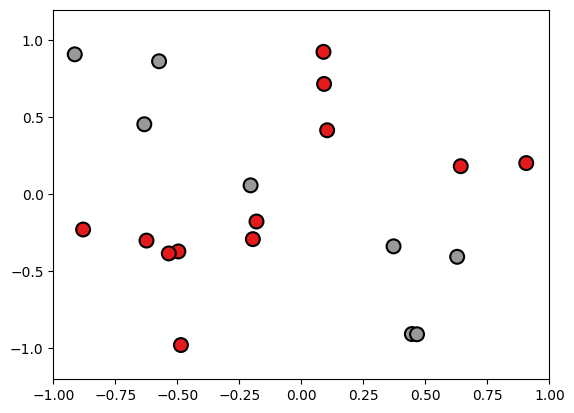

In [16]:
plt.scatter(train_data[:, 0], train_data[:, 1], 
            c=train_labels, s=100, cmap='Set1', edgecolors='black', linewidth=1.5)
plt.xlim(-1, 1)
plt.ylim(-1.2, 1.2)
plt.show()

In [18]:
step = np.arange(-1, 1, 0.05)
step

array([-1.0000000e+00, -9.5000000e-01, -9.0000000e-01, -8.5000000e-01,
       -8.0000000e-01, -7.5000000e-01, -7.0000000e-01, -6.5000000e-01,
       -6.0000000e-01, -5.5000000e-01, -5.0000000e-01, -4.5000000e-01,
       -4.0000000e-01, -3.5000000e-01, -3.0000000e-01, -2.5000000e-01,
       -2.0000000e-01, -1.5000000e-01, -1.0000000e-01, -5.0000000e-02,
        8.8817842e-16,  5.0000000e-02,  1.0000000e-01,  1.5000000e-01,
        2.0000000e-01,  2.5000000e-01,  3.0000000e-01,  3.5000000e-01,
        4.0000000e-01,  4.5000000e-01,  5.0000000e-01,  5.5000000e-01,
        6.0000000e-01,  6.5000000e-01,  7.0000000e-01,  7.5000000e-01,
        8.0000000e-01,  8.5000000e-01,  9.0000000e-01,  9.5000000e-01])